In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns', None)


# Stock Price Prediction 

Giới thiệu Project: ###


## Dataset

Giá chứng khoán Massan 

In [352]:
data = pd.read_csv('../dataset/excel_msn.csv')

In [353]:
data.tail()

,<Ticker>,<DTYYYYMMDD>,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>,<Open>,<High>,<Low>,<Close>,<VolumeDeal>,<VolumeFB>,<VolumeFS>
2771,MSN,20091111,24.9526,25.7697,24.5126,25.1412,416210,39.7,41.0,39.0,40.0,0,2500,0
2772,MSN,20091110,25.7697,25.8325,25.7697,25.7697,241150,41.0,41.1,41.0,41.0,0,5000,0
2773,MSN,20091109,27.6553,28.4095,27.0896,27.0896,379190,44.0,45.2,43.1,43.1,0,113800,0
2774,MSN,20091106,28.4724,28.4724,27.6553,28.4724,1420500,45.3,45.3,44.0,45.3,0,4600,0
2775,MSN,20091105,27.1525,27.1525,27.1525,27.1525,46500,43.2,43.2,43.2,43.2,0,0,0


In [354]:
data.head()

,<Ticker>,<DTYYYYMMDD>,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>,<Open>,<High>,<Low>,<Close>,<VolumeDeal>,<VolumeFB>,<VolumeFS>
0,MSN,20201218,84.1000,84.3000,83.7000,84.100,1417470,84.1,84.3,83.7,84.1,183950,265270,37850
1,MSN,20201217,83.5000,84.3000,82.8000,84.000,1179730,83.5,84.3,82.8,84.0,0,265270,37850
2,MSN,20201216,83.0039,83.5968,82.9051,83.498,648540,84.0,84.6,83.9,84.5,0,120670,81540
3,MSN,20201215,83.4980,83.7944,82.9051,83.498,935010,84.5,84.8,83.9,84.5,185200,136130,369570
4,MSN,20201214,83.6956,84.0909,82.9051,83.498,1079350,84.7,85.1,83.9,84.5,1772000,487490,413690


In [355]:
data.shape

(2776, 14)

- Giá tham chiếu: giá Close ngày hôm trước
- Giá Open: giá chốt lệnh lần đầu tiên trong ngày
- Giá High: giá khớp lệnh cao nhất trong ngày
- Giá Low: giá khớp lệnh thấp nhất trong ngày

In [356]:
columns = [i.replace('<', '').replace('>', '') for i in data.columns]

In [357]:
data = data.rename(columns = {data.columns[i]: columns[i] for i in range(len(data.columns))})

In [358]:
data.index = pd.to_datetime(data['DTYYYYMMDD'], format='%Y%m%d')
data.drop(columns=['DTYYYYMMDD', 'Ticker'], inplace=True)


In [359]:
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

Use 2019-2020 range

In [360]:
df = data[data.index.year.isin([2019, 2020])]

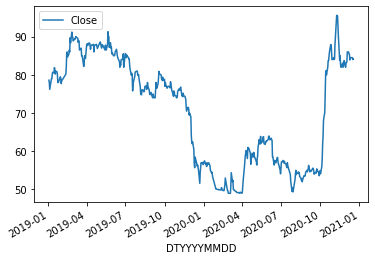

In [361]:
df[['Close']].plot()

Datetime processing

In [362]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume
DTYYYYMMDD,,,,,
2019-01-02,78.9,78.9,78.2,78.6,433670
2019-01-03,78.9,78.9,77.6,78.0,565640
2019-01-04,77.0,77.5,75.5,76.2,463070
2019-01-07,78.1,78.5,77.2,78.2,336380
2019-01-08,78.2,79.1,78.1,79.0,279810


In [363]:
df['date'] = df.index
# df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.weekofyear
df.drop(columns=['date'], inplace=True)

Moving average

In [364]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Close'].rolling(ma).mean()


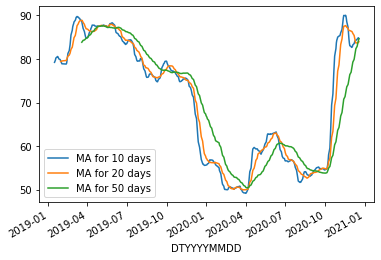

In [365]:
df[['MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()

Shifting values

In [366]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [367]:
for col in cols:
    for i in range(1, 8):
        df[f'{col}_{i}'] = df[col].shift(i)

In [368]:
df.head(10)

,Open,High,Low,Close,Volume,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MA for 10 days,MA for 20 days,MA for 50 days,Open_1,Open_2,Open_3,Open_4,Open_5,Open_6,Open_7,High_1,High_2,High_3,High_4,High_5,High_6,High_7,Low_1,Low_2,Low_3,Low_4,Low_5,Low_6,Low_7,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Volume_1,Volume_2,Volume_3,Volume_4,Volume_5,Volume_6,Volume_7
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,78.9,78.9,78.2,78.6,433670,2,1,1,2019,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,78.9,78.9,77.6,78.0,565640,3,1,1,2019,3,3,1,NaN,NaN,NaN,78.9,NaN,NaN,NaN,NaN,NaN,NaN,78.9,NaN,NaN,NaN,NaN,NaN,NaN,78.2,NaN,NaN,NaN,NaN,NaN,NaN,78.6,NaN,NaN,NaN,NaN,NaN,NaN,433670.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,77.0,77.5,75.5,76.2,463070,4,1,1,2019,4,4,1,NaN,NaN,NaN,78.9,78.9,NaN,NaN,NaN,NaN,NaN,78.9,78.9,NaN,NaN,NaN,NaN,NaN,77.6,78.2,NaN,NaN,NaN,NaN,NaN,78.0,78.6,NaN,NaN,NaN,NaN,NaN,565640.0,433670.0,NaN,NaN,NaN,NaN,NaN
2019-01-07,78.1,78.5,77.2,78.2,336380,0,1,1,2019,7,7,2,NaN,NaN,NaN,77.0,78.9,78.9,NaN,NaN,NaN,NaN,77.5,78.9,78.9,NaN,NaN,NaN,NaN,75.5,77.6,78.2,NaN,NaN,NaN,NaN,76.2,78.0,78.6,NaN,NaN,NaN,NaN,463070.0,565640.0,433670.0,NaN,NaN,NaN,NaN
2019-01-08,78.2,79.1,78.1,79.0,279810,1,1,1,2019,8,8,2,NaN,NaN,NaN,78.1,77.0,78.9,78.9,NaN,NaN,NaN,78.5,77.5,78.9,78.9,NaN,NaN,NaN,77.2,75.5,77.6,78.2,NaN,NaN,NaN,78.2,76.2,78.0,78.6,NaN,NaN,NaN,336380.0,463070.0,565640.0,433670.0,NaN,NaN,NaN
2019-01-09,79.0,79.8,78.9,79.0,339530,2,1,1,2019,9,9,2,NaN,NaN,NaN,78.2,78.1,77.0,78.9,78.9,NaN,NaN,79.1,78.5,77.5,78.9,78.9,NaN,NaN,78.1,77.2,75.5,77.6,78.2,NaN,NaN,79.0,78.2,76.2,78.0,78.6,NaN,NaN,279810.0,336380.0,463070.0,565640.0,433670.0,NaN,NaN
2019-01-10,79.0,81.1,79.0,80.2,450900,3,1,1,2019,10,10,2,NaN,NaN,NaN,79.0,78.2,78.1,77.0,78.9,78.9,NaN,79.8,79.1,78.5,77.5,78.9,78.9,NaN,78.9,78.1,77.2,75.5,77.6,78.2,NaN,79.0,79.0,78.2,76.2,78.0,78.6,NaN,339530.0,279810.0,336380.0,463070.0,565640.0,433670.0,NaN
2019-01-11,80.3,81.2,80.0,80.7,452300,4,1,1,2019,11,11,2,NaN,NaN,NaN,79.0,79.0,78.2,78.1,77.0,78.9,78.9,81.1,79.8,79.1,78.5,77.5,78.9,78.9,79.0,78.9,78.1,77.2,75.5,77.6,78.2,80.2,79.0,79.0,78.2,76.2,78.0,78.6,450900.0,339530.0,279810.0,336380.0,463070.0,565640.0,433670.0
2019-01-14,80.7,81.3,80.3,80.5,268810,0,1,1,2019,14,14,3,NaN,NaN,NaN,80.3,79.0,79.0,78.2,78.1,77.0,78.9,81.2,81.1,79.8,79.1,78.5,77.5,78.9,80.0,79.0,78.9,78.1,77.2,75.5,77.6,80.7,80.2,79.0,79.0,78.2,76.2,78.0,452300.0,450900.0,339530.0,279810.0,336380.0,463070.0,565640.0


Set the High_Low limit

`lowerbound = 0.93 * Close_1`

`upperbound = 1.07 * Close_1`

In [369]:
df['lowerbound'] = 0.93 * df['Close_1']
df['upperbound'] = 1.07 * df['Close_1']

In [370]:
df.dropna(how='any', inplace=True)

In [371]:
df.tail()

,Open,High,Low,Close,Volume,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MA for 10 days,MA for 20 days,MA for 50 days,Open_1,Open_2,Open_3,Open_4,Open_5,Open_6,Open_7,High_1,High_2,High_3,High_4,High_5,High_6,High_7,Low_1,Low_2,Low_3,Low_4,Low_5,Low_6,Low_7,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Volume_1,Volume_2,Volume_3,Volume_4,Volume_5,Volume_6,Volume_7,lowerbound,upperbound
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-14,84.7,85.1,83.9,84.5,1079350,0,4,12,2020,349,14,51,84.54,83.705,82.926,83.9,83.9,85.5,86.1,86.5,84.0,83.3,84.6,85.4,85.7,86.4,87.1,87.5,84.0,83.2,83.6,85.0,85.3,85.5,83.5,82.5,84.5,83.9,85.4,85.5,86.0,86.0,83.4,791100.0,1432910.0,840910.0,855880.0,825210.0,1978040.0,542070.0,78.585,90.415
2020-12-15,84.5,84.8,83.9,84.5,935010,1,4,12,2020,350,15,51,84.69,83.680,83.456,84.7,83.9,83.9,85.5,86.1,86.5,84.0,85.1,84.6,85.4,85.7,86.4,87.1,87.5,83.9,83.2,83.6,85.0,85.3,85.5,83.5,84.5,84.5,83.9,85.4,85.5,86.0,86.0,1079350.0,791100.0,1432910.0,840910.0,855880.0,825210.0,1978040.0,78.585,90.415
2020-12-16,84.0,84.6,83.9,84.5,648540,2,4,12,2020,351,16,51,84.82,83.760,83.908,84.5,84.7,83.9,83.9,85.5,86.1,86.5,84.8,85.1,84.6,85.4,85.7,86.4,87.1,83.9,83.9,83.2,83.6,85.0,85.3,85.5,84.5,84.5,84.5,83.9,85.4,85.5,86.0,935010.0,1079350.0,791100.0,1432910.0,840910.0,855880.0,825210.0,78.585,90.415
2020-12-17,83.5,84.3,82.8,84.0,1179730,3,4,12,2020,352,17,51,84.88,83.860,84.310,84.0,84.5,84.7,83.9,83.9,85.5,86.1,84.6,84.8,85.1,84.6,85.4,85.7,86.4,83.9,83.9,83.9,83.2,83.6,85.0,85.3,84.5,84.5,84.5,84.5,83.9,85.4,85.5,648540.0,935010.0,1079350.0,791100.0,1432910.0,840910.0,855880.0,78.585,90.415
2020-12-18,84.1,84.3,83.7,84.1,1417470,4,4,12,2020,353,18,51,84.69,83.965,84.630,83.5,84.0,84.5,84.7,83.9,83.9,85.5,84.3,84.6,84.8,85.1,84.6,85.4,85.7,82.8,83.9,83.9,83.9,83.2,83.6,85.0,84.0,84.5,84.5,84.5,84.5,83.9,85.4,1179730.0,648540.0,935010.0,1079350.0,791100.0,1432910.0,840910.0,78.120,89.880


Train test split

In [372]:
cols = [i for i in df.columns if i not in ['Open', 'High', 'Low', 'Volume']]
print(cols)

['Close', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Open_1', 'Open_2', 'Open_3', 'Open_4', 'Open_5', 'Open_6', 'Open_7', 'High_1', 'High_2', 'High_3', 'High_4', 'High_5', 'High_6', 'High_7', 'Low_1', 'Low_2', 'Low_3', 'Low_4', 'Low_5', 'Low_6', 'Low_7', 'Close_1', 'Close_2', 'Close_3', 'Close_4', 'Close_5', 'Close_6', 'Close_7', 'Volume_1', 'Volume_2', 'Volume_3', 'Volume_4', 'Volume_5', 'Volume_6', 'Volume_7', 'lowerbound', 'upperbound']


In [373]:
df = df[cols]
label_col = 'Close'

In [374]:
from sklearn.model_selection import train_test_split

In [402]:
def get_data_splits(df, train_ratio: float, validation_ratio: float, test_ratio: float):
    train_len = int(df.shape[0] * train_ratio)
    train_data = df.iloc[: train_len]
    test_len = int(df.shape[0] * test_ratio)
    test_data = df.iloc[-test_len:]
    val_data = df.iloc[train_len:-test_len]
    return train_data, val_data, test_data

In [403]:
train_data, _, test_data = get_data_splits(df, train_ratio=0.5, validation_ratio=0, test_ratio=0.5)


In [404]:
train_data

,Close,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MA for 10 days,MA for 20 days,MA for 50 days,Open_1,Open_2,Open_3,Open_4,Open_5,Open_6,Open_7,High_1,High_2,High_3,High_4,High_5,High_6,High_7,Low_1,Low_2,Low_3,Low_4,Low_5,Low_6,Low_7,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Volume_1,Volume_2,Volume_3,Volume_4,Volume_5,Volume_6,Volume_7,lowerbound,upperbound
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-19,0.896135,1,1,3,2019,78,19,12,1.000000,1.000000,0.870181,0.892377,0.939462,0.948430,0.932203,0.957071,0.919192,0.944444,0.903846,0.937500,0.944712,0.947368,0.958549,0.948649,0.956640,0.884259,0.895833,0.972222,0.967337,0.957286,0.957071,0.967172,0.891041,0.883777,0.934625,0.944175,0.932039,0.957179,0.962217,0.129670,0.240595,0.026396,0.175114,0.109132,0.099685,0.075422,0.891041,0.891041
2019-03-20,0.847826,2,1,3,2019,79,20,12,0.986431,0.998559,0.874540,0.910314,0.892377,0.939462,0.944310,0.929293,0.957071,0.919192,0.896635,0.903846,0.937500,0.942356,0.945596,0.956757,0.948509,0.912037,0.884259,0.895833,0.969849,0.967337,0.957071,0.957071,0.895884,0.891041,0.883777,0.934466,0.944175,0.929471,0.957179,0.070433,0.129670,0.240595,0.026396,0.175114,0.109132,0.099685,0.895884,0.895884
2019-03-21,0.847826,3,1,3,2019,80,21,12,0.972863,0.991784,0.879308,0.863229,0.910314,0.892377,0.934625,0.941919,0.929293,0.957071,0.870192,0.896635,0.903846,0.934837,0.940415,0.943243,0.956640,0.865741,0.912037,0.884259,0.886935,0.969849,0.967172,0.957071,0.847458,0.895884,0.891041,0.883495,0.934466,0.942065,0.929471,0.097711,0.070433,0.129670,0.240595,0.026396,0.175114,0.109132,0.847458,0.847458
2019-03-22,0.835749,4,1,3,2019,81,22,12,0.958480,0.986163,0.884961,0.860987,0.863229,0.910314,0.883777,0.931818,0.941919,0.929293,0.850962,0.870192,0.896635,0.899749,0.932642,0.937838,0.943089,0.872685,0.865741,0.912037,0.874372,0.886935,0.969697,0.967172,0.847458,0.847458,0.895884,0.890777,0.883495,0.931990,0.942065,0.111157,0.097711,0.070433,0.129670,0.240595,0.026396,0.175114,0.847458,0.847458
2019-03-25,0.780193,0,1,3,2019,84,25,13,0.938399,0.973191,0.887686,0.856502,0.860987,0.863229,0.903148,0.878788,0.931818,0.941919,0.848558,0.850962,0.870192,0.892231,0.896373,0.929730,0.937669,0.877315,0.872685,0.865741,0.904523,0.874372,0.886364,0.969697,0.835351,0.847458,0.847458,0.895631,0.890777,0.879093,0.931990,0.128379,0.111157,0.097711,0.070433,0.129670,0.240595,0.026396,0.835351,0.835351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,0.004831,4,1,1,2020,31,31,5,0.071642,0.039781,0.065795,0.141256,0.168161,0.170404,0.121065,0.111111,0.121212,0.133838,0.072115,0.110577,0.117788,0.085213,0.088083,0.062162,0.062331,0.078704,0.155093,0.173611,0.075377,0.125628,0.151515,0.146465,0.002421,0.082324,0.108959,0.101942,0.118932,0.115869,0.123426,0.280579,0.088316,0.057053,0.088550,0.080400,0.042578,0.057778,0.002421,0.002421
2020-02-03,0.002415,0,1,2,2020,34,3,6,0.052646,0.029836,0.049108,0.073991,0.141256,0.168161,0.104116,0.083333,0.111111,0.121212,0.040865,0.072115,0.110577,0.080201,0.054404,0.048649,0.059621,0.078704,0.078704,0.155093,0.103015,0.075377,0.121212,0.151515,0.002421,0.002421,0.082324,0.106796,0.101942,0.085642,0.115869,0.134262,0.280579,0.088316,0.057053,0.088550,0.080400,0.042578,0.002421,0.002421
2020-02-04,0.002415,1,1,2,2020,35,4,6,0.034735,0.019602,0.032489,0.000000,0.073991,0.141256,0.101695,0.065657,0.083333,0.111111,0.000000,0.040865,0.072115,0.072682,0.049223,0.013514,0.046070,0.000000,0.078704,0.078704,0.082915,0.103015,0.070707,0.121212,0.000000,0.002421,0.002421,0.080097,0.106796,0.068010,0.085642,0.225595,0.134262,0.280579,0.088316,0.057053,0.088550,0.080400,0.000000,0.000000


In [405]:
test_data

,Close,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MA for 10 days,MA for 20 days,MA for 50 days,Open_1,Open_2,Open_3,Open_4,Open_5,Open_6,Open_7,High_1,High_2,High_3,High_4,High_5,High_6,High_7,Low_1,Low_2,Low_3,Low_4,Low_5,Low_6,Low_7,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Volume_1,Volume_2,Volume_3,Volume_4,Volume_5,Volume_6,Volume_7,lowerbound,upperbound
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-07,0.019313,4,1,2,2020,38,7,6,0.050843,0.103001,0.218184,0.069697,0.080808,0.072727,0.004040,0.070707,0.131313,0.155556,0.019388,0.030612,0.040816,0.020408,0.055102,0.081633,0.114286,0.022680,0.057732,0.063918,0.004124,0.074227,0.074227,0.142268,0.019313,0.021459,0.021459,0.021459,0.023605,0.023605,0.094421,0.313235,0.052509,0.051585,0.138374,0.058973,0.186175,0.019029,0.019313,0.019313
2020-02-10,0.019313,0,1,2,2020,41,10,7,0.040088,0.094125,0.206147,0.066667,0.069697,0.080808,0.072727,0.004040,0.070707,0.131313,0.018367,0.019388,0.030612,0.040816,0.020408,0.055102,0.081633,0.049485,0.022680,0.057732,0.063918,0.004124,0.074227,0.074227,0.019313,0.019313,0.021459,0.021459,0.021459,0.023605,0.023605,0.081389,0.313235,0.052509,0.051585,0.138374,0.058973,0.186175,0.019313,0.019313
2020-02-11,0.019313,1,1,2,2020,42,11,7,0.028844,0.084984,0.193526,0.068687,0.066667,0.069697,0.080808,0.072727,0.004040,0.070707,0.018367,0.018367,0.019388,0.030612,0.040816,0.020408,0.055102,0.049485,0.049485,0.022680,0.057732,0.063918,0.004124,0.074227,0.019313,0.019313,0.019313,0.021459,0.021459,0.021459,0.023605,0.028583,0.081389,0.313235,0.052509,0.051585,0.138374,0.058973,0.019313,0.019313
2020-02-12,0.032189,2,1,2,2020,43,12,7,0.021755,0.077698,0.181255,0.054545,0.068687,0.066667,0.069697,0.080808,0.072727,0.004040,0.055102,0.018367,0.018367,0.019388,0.030612,0.040816,0.020408,0.057732,0.049485,0.049485,0.022680,0.057732,0.063918,0.004124,0.019313,0.019313,0.019313,0.019313,0.021459,0.021459,0.021459,0.264229,0.028583,0.081389,0.313235,0.052509,0.051585,0.138374,0.019313,0.019313
2020-02-13,0.025751,3,1,2,2020,44,13,7,0.022000,0.068689,0.169101,0.070707,0.054545,0.068687,0.066667,0.069697,0.080808,0.072727,0.034694,0.055102,0.018367,0.018367,0.019388,0.030612,0.040816,0.074227,0.057732,0.049485,0.049485,0.022680,0.057732,0.063918,0.032189,0.019313,0.019313,0.019313,0.019313,0.021459,0.021459,0.061099,0.264229,0.028583,0.081389,0.313235,0.052509,0.051585,0.032189,0.032189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,0.761803,0,4,12,2020,349,14,51,0.865314,0.894814,0.950216,0.755556,0.755556,0.787879,0.800000,0.808081,0.757576,0.743434,0.726531,0.742857,0.748980,0.763265,0.777551,0.785714,0.714286,0.758763,0.767010,0.795876,0.802062,0.806186,0.764948,0.744330,0.761803,0.748927,0.781116,0.783262,0.793991,0.793991,0.738197,0.058933,0.161013,0.066855,0.069236,0.064358,0.247717,0.019325,0.761803,0.761803
2020-12-15,0.761803,1,4,12,2020,350,15,51,0.868981,0.894151,0.965701,0.771717,0.755556,0.755556,0.787879,0.800000,0.808081,0.757576,0.736735,0.726531,0.742857,0.748980,0.763265,0.777551,0.785714,0.773196,0.758763,0.767010,0.795876,0.802062,0.806186,0.764948,0.761803,0.761803,0.748927,0.781116,0.783262,0.793991,0.793991,0.104779,0.058933,0.161013,0.066855,0.069236,0.064358,0.247717,0.761803,0.761803
2020-12-16,0.761803,2,4,12,2020,351,16,51,0.872158,0.896271,0.978906,0.767677,0.771717,0.755556,0.755556,0.787879,0.800000,0.808081,0.730612,0.736735,0.726531,0.742857,0.748980,0.763265,0.777551,0.773196,0.773196,0.758763,0.767010,0.795876,0.802062,0.806186,0.761803,0.761803,0.761803,0.748927,0.781116,0.783262,0.793991,0.081822,0.104779,0.058933,0.161013,0.066855,0.069236,0.064358,0.761803,0.761803


Min Max scaling

In [406]:
import sklearn.preprocessing
def minmax_scale(df: pd.DataFrame, cont_features: list = None):
    if cont_features is None:
        cont_features = df.columns
    scaler = sklearn.preprocessing.MinMaxScaler()
    df[cont_features] = scaler.fit_transform(df[cont_features].to_numpy())

    return df

In [407]:
train_data = minmax_scale(train_data)
test_data = minmax_scale(test_data)

In [408]:
X_train, y_train = train_data.drop(columns=[label_col]), train_data[label_col]
X_test, y_test = test_data.drop(columns=[label_col]), test_data[label_col]

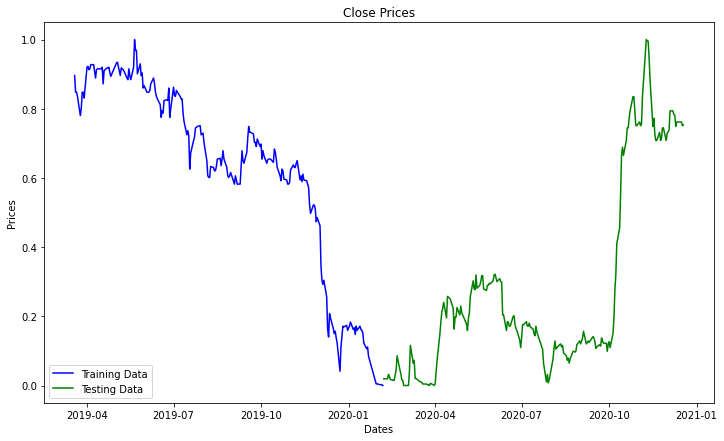

In [409]:
plt.figure(figsize=(12,7))
plt.title('Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(y_train, 'blue', label='Training Data')
plt.plot(y_test, 'green', label='Testing Data')
plt.legend()


### Feature Selection

In [410]:
from sklearn.feature_selection import SelectKBest, f_regression

In [411]:
print(X_train.shape)

(222, 47)


In [412]:
np.sqrt(221)

14.866068747318506

In [413]:
k = 14
select_k_best = SelectKBest(f_regression, k=k)
select_k_best.fit(X_train, y_train)


SelectKBest(k=14, score_func=<function f_regression at 0x00000200CA3161F0>)

In [414]:
X_train_cols = train_data.columns[np.argsort(select_k_best.scores_)[::-1][:k]]
print(X_train_cols)

Index(['lowerbound', 'Low_7', 'Volume_7', 'Open_7', 'High_7', 'Close_1',
       'MA for 50 days', 'High_1', 'Low_1', 'weekofyear', 'Close_2', 'Open_1',
       'High_2', 'Low_2'],
      dtype='object')


In [415]:
X_train = select_k_best.transform(X_train)

In [416]:
X_train = pd.DataFrame(X_train, columns=X_train_cols)

In [417]:
X_test = X_test[X_train_cols]
X_test.shape


(222, 14)

## Baseline

Linear Regression

In [418]:
from sklearn.linear_model import LinearRegression

In [419]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

Evaluate

In [420]:
from sklearn.metrics import mean_squared_error, r2_score

In [421]:
def MAPE(y_true, y_pred):
    error = np.abs(y_true - y_pred) / y_true
    error.replace([np.inf, -np.inf], np.nan, inplace=True)
    error = error[~np.isnan(error)]

    return np.mean(error) * 100


In [422]:
y_pred = linear_reg.predict(X_test)
y_pred = pd.Series(y_pred, index=y_test.index)
MAPE(y_test, y_pred)

280.8799671494464

In [423]:
mean_squared_error(y_test, y_pred)

0.013251737814309278

In [424]:
r2_score(y_test, y_pred)

0.8280802523638702

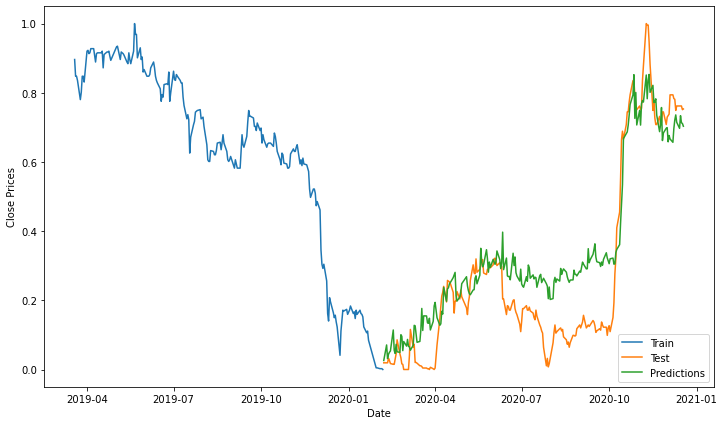

In [425]:
plt.figure(figsize=(12, 7))
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(y_train)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

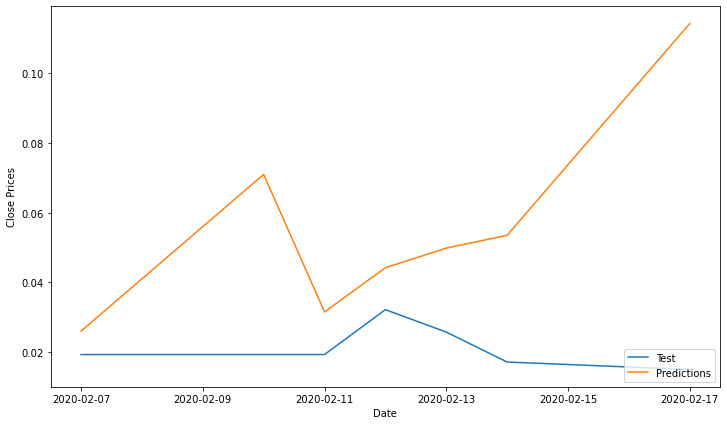

In [426]:
plt.figure(figsize=(12, 7))
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(y_test[:7])
plt.plot(y_pred[:7])
plt.legend(['Test', 'Predictions'], loc='lower right')
plt.show()

In [427]:
k = 5
top_k_coefs = np.abs(linear_reg.coef_).argsort()[::-1][:k]
print(linear_reg.coef_[top_k_coefs])
X_train.columns[top_k_coefs]

[-0.43523324  0.37852513  0.3209755   0.2947102   0.2947102 ]


Index(['Low_7', 'Open_7', 'Low_1', 'weekofyear', 'Low_2'], dtype='object')